<a href="https://colab.research.google.com/github/sabil62/scaling-computing-machine/blob/main/0first.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
data=pd.read_csv("/content/drive/MyDrive/data sheet/headbrain.csv")
data.head(6)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300


In [38]:
x=data["Head Size(cm^3)"]
y=data["Brain Weight(grams)"]

In [15]:
print(x)
print(y)

0      4512
1      3738
2      4261
3      3777
4      4177
       ... 
232    3214
233    3394
234    3233
235    3352
236    3391
Name: Head Size(cm^3), Length: 237, dtype: int64
0      1530
1      1297
2      1335
3      1282
4      1590
       ... 
232    1110
233    1215
234    1104
235    1170
236    1120
Name: Brain Weight(grams), Length: 237, dtype: int64


In [19]:
x.head()


0    4512
1    3738
2    4261
3    3777
4    4177
Name: Head Size(cm^3), dtype: int64

**Visualizing Data**

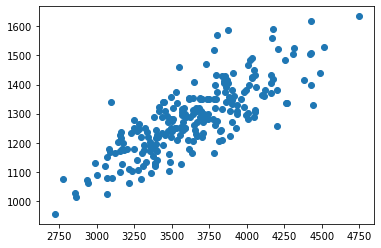

In [21]:
plt.scatter(x,y)

In [29]:
type(x)

numpy.ndarray

In [39]:
x.shape

(237,)

In [36]:
X = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)
y.shape


(237, 1)

In [40]:
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:

print(model.score(X,y))

0.639311719957


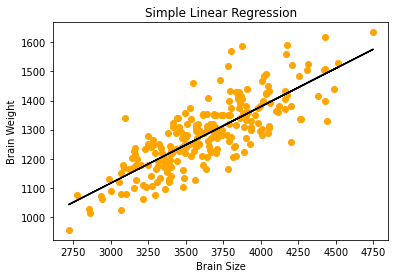

In [45]:
plt.scatter(X,y,color = 'orange')
plt.plot(X,model.predict(X),color = 'black')
plt.title("Simple Linear Regression")
plt.xlabel("Brain Size")
plt.ylabel("Brain Weight")
plt.show()

In [47]:
print(model.predict([[2000]]))

[852.43210003]


# **New set**

In [50]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [58]:
datamul = pd.read_csv('/content/drive/MyDrive/data sheet/50_Startups.csv')
datamul.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [62]:
# profits vs others
X1 = datamul[["R&D Spend","Administration","Marketing Spend","State"]]
print(X1)
y1 = datamul["Profit"]
# printing profits
print("---------------------------profits----------------------------")
print(y1)

    R&D Spend  Administration  Marketing Spend       State
0   165349.20       136897.80        471784.10    New York
1   162597.70       151377.59        443898.53  California
2   153441.51       101145.55        407934.54     Florida
3   144372.41       118671.85        383199.62    New York
4   142107.34        91391.77        366168.42     Florida
5   131876.90        99814.71        362861.36    New York
6   134615.46       147198.87        127716.82  California
7   130298.13       145530.06        323876.68     Florida
8   120542.52       148718.95        311613.29    New York
9   123334.88       108679.17        304981.62  California
10  101913.08       110594.11        229160.95     Florida
11  100671.96        91790.61        249744.55  California
12   93863.75       127320.38        249839.44     Florida
13   91992.39       135495.07        252664.93  California
14  119943.24       156547.42        256512.92     Florida
15  114523.61       122616.84        261776.23    New Yo

In [55]:
type(X1)

pandas.core.frame.DataFrame

# **Preprocessing**

In [68]:
# converting the types into machine understandable type
le = LabelEncoder()
X1[['State']] = le.fit_transform(datamul.State)
# printing the name of states rough eg newyork is 1
print(X1['State'].values)
# remember not print(X1['State'].values)

[2 0 1 2 1 2 0 1 2 0 1 0 1 0 1 2 0 2 1 2 0 2 1 1 2 0 1 2 1 2 1 2 0 1 0 2 1
 0 2 0 0 1 0 2 0 2 1 0 2 0]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [69]:
print(X1.values)
# print(X1['State'].values)

[[1.6534920e+05 1.3689780e+05 4.7178410e+05 2.0000000e+00]
 [1.6259770e+05 1.5137759e+05 4.4389853e+05 0.0000000e+00]
 [1.5344151e+05 1.0114555e+05 4.0793454e+05 1.0000000e+00]
 [1.4437241e+05 1.1867185e+05 3.8319962e+05 2.0000000e+00]
 [1.4210734e+05 9.1391770e+04 3.6616842e+05 1.0000000e+00]
 [1.3187690e+05 9.9814710e+04 3.6286136e+05 2.0000000e+00]
 [1.3461546e+05 1.4719887e+05 1.2771682e+05 0.0000000e+00]
 [1.3029813e+05 1.4553006e+05 3.2387668e+05 1.0000000e+00]
 [1.2054252e+05 1.4871895e+05 3.1161329e+05 2.0000000e+00]
 [1.2333488e+05 1.0867917e+05 3.0498162e+05 0.0000000e+00]
 [1.0191308e+05 1.1059411e+05 2.2916095e+05 1.0000000e+00]
 [1.0067196e+05 9.1790610e+04 2.4974455e+05 0.0000000e+00]
 [9.3863750e+04 1.2732038e+05 2.4983944e+05 1.0000000e+00]
 [9.1992390e+04 1.3549507e+05 2.5266493e+05 0.0000000e+00]
 [1.1994324e+05 1.5654742e+05 2.5651292e+05 1.0000000e+00]
 [1.1452361e+05 1.2261684e+05 2.6177623e+05 2.0000000e+00]
 [7.8013110e+04 1.2159755e+05 2.6434606e+05 0.0000000e+0

## **New**

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1,y1, test_size=0.2, random_state=1)

In [87]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
y_pred = model.predict(X_test)

In [89]:
print(y_pred.sum().mean())
print(y_test.sum().mean())

1012608.0917095677
1018561.53


## **Accuracy**

In [90]:
print(" Accuracy ", y_pred.sum().mean()/y_test.sum().mean())

 Accuracy  0.9941550528710501


##  NEW (Polynomial **Regression**) 

---



In [92]:
datas = pd.read_csv('/content/drive/MyDrive/data sheet/Drugs_Performance.csv')
datas.head()

,Age,Drugs_Perf
0,1,1.166667
1,2,1.833333
2,3,2.833333
3,4,4.166667
4,5,5.833333


In [94]:
X = datas['Age'].values
Y = datas['Drugs_Perf'].values

In [96]:
X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84])

In [98]:
X.shape


(84,)

In [100]:
type(X)

numpy.ndarray

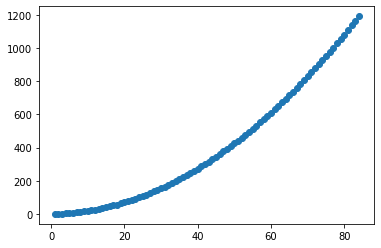

In [102]:
plt.scatter(X,Y)
plt.show()

In [104]:
X = np.array(X).reshape(-1,1)
Y = np.array(Y).reshape(-1,1)

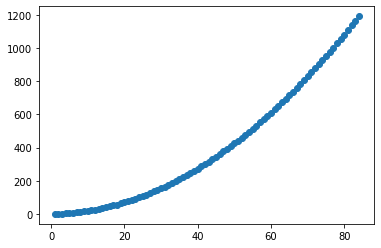

In [106]:
plt.scatter(X,Y)
plt.show()

In [112]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [114]:
# test_zie=0.2 is 20% for test and 80 for training
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2) #random_state=1 not done

In [116]:
# making degree of polynomial 2 because the scatter plot in 106 up+2 resembles polynomial 2 degree curve
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly,Y_train)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [118]:
model = LinearRegression()
model.fit(X_poly,Y_train)
# here we have included X_poly so in model.predict() also use x_poly

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Drugs Performance')

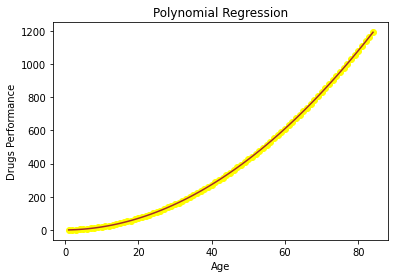

In [124]:
plt.scatter(X,Y, color = 'yellow')
# predicting value of y on the basis of value of x*(and as we model.fit(--x_poly==,..)) so use x_poly and that is poly.fit_transform(x)
plt.plot(X,model.predict(poly.fit_transform(X)), color = 'brown')
plt.title('Polynomial Regression')
plt.xlabel('Age')
plt.ylabel('Drugs Performance')